In [90]:
import pandas as pd 
import numpy as np
#impot counter 
from collections import Counter
# import matplotlib
import matplotlib.pyplot as plt
# seaborn import 
import seaborn as sns

In [91]:
PSP = pd.read_csv('Kinase_Substrate_Dataset_human.txt', sep='\t')
# make all name of kinase in upper case 
PSP['KINASE'] = PSP['KINASE'].str.upper()
PSP.head()

,GENE,KINASE,KIN_ACC_ID,KIN_ORGANISM,SUBSTRATE,SUB_GENE_ID,SUB_ACC_ID,SUB_GENE,SUB_ORGANISM,SUB_MOD_RSD,SITE_GRP_ID,SITE_+/-7_AA,DOMAIN,IN_VIVO_RXN,IN_VITRO_RXN,CST_CAT#
0,EIF2AK1,HRI,Q9BQI3,human,eIF2-alpha,1965.0,P05198,EIF2S1,human,S52,447635,MILLsELsRRRIRsI,S1,,X,3597; 9721; 3398; 5199; 53085
1,EIF2AK1,HRI,Q9BQI3,human,eIF2-alpha,1965.0,P05198,EIF2S1,human,S49,450210,IEGMILLsELsRRRI,S1,,X,NaN
2,PRKCD,PKCD,Q05655,human,HDAC5,10014.0,Q9UQL6,HDAC5,human,S259,447995,FPLRkTAsEPNLKVR,NaN,,X,3443
3,PRKCD,PKCD,Q05655,human,PTPRA iso2,5786.0,P18433-2,PTPRA,human,S204,447612,PLLARSPsTNRKYPP,NaN,X,,NaN
4,PRKCD,PKCD,Q05655,human,Bcl-2,596.0,P10415,BCL2,human,S70,448395,RDPVARtsPLQtPAA,NaN,X,,2834; 2827


In [114]:
PSP['lenght_of_sequence']= PSP['SITE_+/-7_AA'].str.len()
PSP['lenght_of_sequence'].value_counts()

15    13733
Name: lenght_of_sequence, dtype: int64

In [92]:
scop3p = pd.read_csv('../data/UnknownKinaseMotif.txt', sep='\t')
# make all Family name in upper case
scop3p['Family'] = scop3p['Family'].str.upper()
scop3p.head()

,KIN_ACC_ID,SUB_ACC_ID,score,Family,GENE,UP_POS,+/-7AA
0,Q5S007,A0A0A6YYL3,307,LRRK,LRRK2,365,NSQPEKMSQEPEINK
1,Q5S007,A0A0A6YYL3,307,LRRK,LRRK2,490,EDLLRENSMLREEIA
2,O43318,A0AUZ9,540,MLK,MAP3K7,756,LSRIQNSSRNTARRR
3,O14578,A0AV96,270,DMPK,CIT,453,IPAIGAQYSMFPAAP
4,O14578,A0AV96,270,DMPK,CIT,519,PFQGRPITPVYTVAP


In [93]:
#rename colum +/-7AA to SITE_+/-7_AA
scop3p = scop3p.rename(columns = {'+/-7AA':'SITE_+/-7_AA'})

In [110]:
scop3p.head()

,KIN_ACC_ID,SUB_ACC_ID,score,Family,GENE,UP_POS,SITE_+/-7_AA
0,Q5S007,A0A0A6YYL3,307,LRRK,LRRK2,365,NSQPEKMSQEPEINK
1,Q5S007,A0A0A6YYL3,307,LRRK,LRRK2,490,EDLLRENSMLREEIA
2,O43318,A0AUZ9,540,MLK,MAP3K7,756,LSRIQNSSRNTARRR
3,O14578,A0AV96,270,DMPK,CIT,453,IPAIGAQYSMFPAAP
4,O14578,A0AV96,270,DMPK,CIT,519,PFQGRPITPVYTVAP


In [111]:
scop3p['length_of_sequence'] = scop3p['SITE_+/-7_AA'].str.len()
scop3p.head()

,KIN_ACC_ID,SUB_ACC_ID,score,Family,GENE,UP_POS,SITE_+/-7_AA,length_of_sequence
0,Q5S007,A0A0A6YYL3,307,LRRK,LRRK2,365,NSQPEKMSQEPEINK,15.0
1,Q5S007,A0A0A6YYL3,307,LRRK,LRRK2,490,EDLLRENSMLREEIA,15.0
2,O43318,A0AUZ9,540,MLK,MAP3K7,756,LSRIQNSSRNTARRR,15.0
3,O14578,A0AV96,270,DMPK,CIT,453,IPAIGAQYSMFPAAP,15.0
4,O14578,A0AV96,270,DMPK,CIT,519,PFQGRPITPVYTVAP,15.0


In [112]:
scop3p['length_of_sequence'].value_counts()

15.0    64978
9.0       135
14.0      130
13.0      121
10.0      107
12.0      106
11.0      106
8.0       102
Name: length_of_sequence, dtype: int64

In [116]:
scop3p = scop3p[scop3p['length_of_sequence'] == 15]

In [117]:
def create_pssm(df, kinase_col, sequence_col, limited_family = True, verbose = True):

    #capitalize evreything in the sequence_col column
    df[sequence_col] = df[sequence_col].str.upper()

    # Group by 'KINASE_psp' and combine all sequences into a list
    kinase_sequences = df.groupby(kinase_col)[sequence_col].apply(list)

    # Initialize an empty dictionary to store the Logos for each kinase
    data_store = {}

    # For each kinase, create a position frequency matrix and then a sequence logo
    for kinase, sequences in kinase_sequences.items():
        if kinase not in need_family and limited_family:
            # print(f"kinase {kinase} is not here") 
            continue 
        if verbose: 
            print(f"for {kinase} all the sequences are {kinase_sequences[kinase]}")

        # Combine sequences into a single string for each position
        try: 
            aligned_sequences = [''.join(seq) for seq in zip(*sequences)]
            if len(aligned_sequences) !=15:
                continue
        except:
            continue
        
        # Create a DataFrame where each row corresponds to one position
        position_df = pd.DataFrame([Counter(pos) for pos in aligned_sequences]).fillna(0)
        
        # Normalize the counts to get frequencies
        position_freq_matrix = position_df.div(position_df.sum(axis=0), axis=1)
        
        data_store[kinase] = position_freq_matrix
    # print(data_store)

    return data_store

In [118]:
scop3p[scop3p['Family']=='BCR']['SITE_+/-7_AA'].apply(lambda x: len(x)).value_counts()

15    114
Name: SITE_+/-7_AA, dtype: int64

In [119]:
scop3p[scop3p['Family']=='BCR']['SITE_+/-7_AA']

7527     QEKVENKTPLVNESL
7528     GEGALDLSDVHSPPK
7529     LDLSDVHSPPKSPEG
7530     DVHSPPKSPEGKTSA
7531     GKTSAQTTPSKIPRY
              ...       
60178    GYQSHDDSSDNSECS
60179    YQSHDDSSDNSECSF
60180    HDDSSDNSECSFPFK
60181    SSDNSECSFPFKYTY
61314    AYIKDCVSPSEYTAA
Name: SITE_+/-7_AA, Length: 114, dtype: object

In [120]:
scop3p[scop3p['Family']=='BCR']['SITE_+/-7_AA'].apply(list)

7527     [Q, E, K, V, E, N, K, T, P, L, V, N, E, S, L]
7528     [G, E, G, A, L, D, L, S, D, V, H, S, P, P, K]
7529     [L, D, L, S, D, V, H, S, P, P, K, S, P, E, G]
7530     [D, V, H, S, P, P, K, S, P, E, G, K, T, S, A]
7531     [G, K, T, S, A, Q, T, T, P, S, K, I, P, R, Y]
                             ...                      
60178    [G, Y, Q, S, H, D, D, S, S, D, N, S, E, C, S]
60179    [Y, Q, S, H, D, D, S, S, D, N, S, E, C, S, F]
60180    [H, D, D, S, S, D, N, S, E, C, S, F, P, F, K]
60181    [S, S, D, N, S, E, C, S, F, P, F, K, Y, T, Y]
61314    [A, Y, I, K, D, C, V, S, P, S, E, Y, T, A, A]
Name: SITE_+/-7_AA, Length: 114, dtype: object

In [121]:
scop3p['SITE_+/-7_AA'].str.upper()

0        NSQPEKMSQEPEINK
1        EDLLRENSMLREEIA
2        LSRIQNSSRNTARRR
3        IPAIGAQYSMFPAAP
4        PFQGRPITPVYTVAP
              ...       
66377    PQSSPTSTPKLSKSL
66378    STPKLSKSLSFEMQQ
66379    PKLSKSLSFEMQQDE
66380    ELIEKPMSPMQYARS
66381    IVGGSDPYGQKGLKN
Name: SITE_+/-7_AA, Length: 64978, dtype: object

In [122]:
all_sequences = sorted({c for c in scop3p['SITE_+/-7_AA'].str.upper().str.cat() })

In [123]:
PSP.head(2)

,GENE,KINASE,KIN_ACC_ID,KIN_ORGANISM,SUBSTRATE,SUB_GENE_ID,SUB_ACC_ID,SUB_GENE,SUB_ORGANISM,SUB_MOD_RSD,SITE_GRP_ID,SITE_+/-7_AA,DOMAIN,IN_VIVO_RXN,IN_VITRO_RXN,CST_CAT#,lenght_of_sequence
0,EIF2AK1,HRI,Q9BQI3,human,eIF2-alpha,1965.0,P05198,EIF2S1,human,S52,447635,MILLSELSRRRIRSI,S1,,X,3597; 9721; 3398; 5199; 53085,15
1,EIF2AK1,HRI,Q9BQI3,human,eIF2-alpha,1965.0,P05198,EIF2S1,human,S49,450210,IEGMILLSELSRRRI,S1,,X,NaN,15


In [124]:
PSP_pssm = create_pssm(PSP, 'KINASE', 'SITE_+/-7_AA', limited_family=False)

for AAK1 all the sequences are ['SQITSQVTGQIGWRR', 'LRVVDEKTKDLIVDQ']
for ABL all the sequences are ['SGLSMSSYSVPRTPD', 'PAPDELVYQVPQSTQ', 'GDYQRPHSAQPADRG', 'QFIAVTAYQNAEITQ', 'NANGEAVYCKFHYKT', 'EKEPEVDYRTVTINT', 'RLMTGDTYTAHAGAK', 'SVPTHSPYAQPSSTF', 'PPPLVGTYNTLLSRT', 'RPFSPSAYSLPASLN', 'KKKTEGTYDLPYWDR', 'KIDTMGTYHGMTLKS', 'THPGTSDSYSAPRDC', 'STFIGEHYVHVNATY', 'AQDLARSYGIPYIET', 'SGLCSPSYVAVTPFS', 'TVKEVMHYLGQYIMV', 'LGQEEDVYHTVDDDE', 'GEGYKKKYQQVDEEF', 'HPPGNEIYRKGTISF', 'CDEEENFYQQQQQSE', 'GGPEPGPYAQPSVNT', 'RGNADLAYILSMEPC', 'PVPNQPVYNQPVYNQ', 'IENEEQEYVQTVKSS', 'VGEEEHVYSFPNKQK', 'MLPESTVYGDVDLSN', 'IPEPAHAYAQPQTTT', 'EAEGDEIYEDLMRSE', 'RQSVLVPYEPPQVGT', 'VYQVPQSTQEVSGAG', 'RIPGGNIYISPLKSP', 'FHYRPGDYLYLNIPT', 'ITTGGVTYREQPWHK', 'QSQESEDYSQPSTSS', 'SIQGHNDYMCPATNQ', 'APIPSVPYAPFAAIL', 'DSTRLILYNDGDSLQ', 'NLQNGPIYARVIQKR', 'TSVYESPYSDPEELK', 'GPEPPPVYTNLSSYS', 'TFLPVPEYINQSVPK', 'TPVRYSSSEVNHLSP', 'PPTVPNDYMTSPARL', 'DVVEILPYLPCLTAR', 'SVTAPSPYAQPSSTF', 'RLMTGDTYTAHAGAK', 'PGTSD

In [125]:
scop3p.head(2)

,KIN_ACC_ID,SUB_ACC_ID,score,Family,GENE,UP_POS,SITE_+/-7_AA,length_of_sequence
0,Q5S007,A0A0A6YYL3,307,LRRK,LRRK2,365,NSQPEKMSQEPEINK,15.0
1,Q5S007,A0A0A6YYL3,307,LRRK,LRRK2,490,EDLLRENSMLREEIA,15.0


In [126]:
scop3p_pssm = create_pssm(scop3p, 'Family', 'SITE_+/-7_AA', limited_family=False)

for ABC1 all the sequences are ['GIQDRVLYVLKLYDK', 'KIDPEKLSVNSHFMK', 'ATFTRGRSINLALSH', 'PYGTKSQYILSVSRE', 'DKFSNDLSLCLPVFS', 'FPAKAVDSLEQISNL', 'KPNFIIKTPKGTRDL', 'PKGTRDLSPQHMVVR', 'GEDSGLMYDLKDQGG', 'KEAKLDRSDVTEREG', 'RGFVVQGSNGEFPFL', 'IEPNAAVTRRFGIPG', 'LPGWRGRSFALARAA', 'PLGRLGASVIGIDPV', 'SRMAPPASRAPQMRA']
for ABL all the sequences are ['RGRSKRSSDPSPAGD', 'APAKGNKSPSPPDGS', 'AKGNKSPSPPDGSPA', 'SPSPPDGSPAATPEI', 'PDGSPAATPEIRVNH', 'PEPAGGATPGATLPK', 'GGATPGATLPKSPSQ', 'PGATLPKSPSQLRKG', 'VPPPPKHTPSKEVKQ', 'LGANPRRTPQGPRPG', 'ARKAGGQTEINSLRA', 'CGMIKRFSGLLHGSP', 'SLAASAASTETLTPT', 'LAASAASTETLTPTP', 'YVSDREGSDATGDGT', 'EKKEAEDSLRREKNL', 'HIRDVCLYPRFVQRC', 'QLNSECNSDVVCPHK', 'HLKKINLSNNKVSEI', 'SHRKAVISQGLPHPF', 'RKVLINNSLDEPRAI', 'PGMGNLTYSNPSYRT', 'ATPERRGSLPDTGWK', 'MAMGDDKSFDDEESV', 'KSFDDEESVDGNRPS', 'VDGNRPSSAASAFKV', 'GPKVGGASKEGGAGA', 'DDFIKAFTDVPSIQI', 'NKIREILSDDKHDWD', 'SLQTYLKSSGSVASL', 'TYLKSSGSVASLPQS', 'KSSGSVASLPQSDRS', 'SVASLPQSDRSSSSS', 'QSDRSSSSSQESLNR', 'SDRSS

In [127]:
common_family = set(PSP_pssm.keys()).intersection(set(scop3p_pssm.keys()))

In [128]:
common_family

{'ABL',
 'ALK',
 'AXL',
 'BCR',
 'CDC7',
 'CSK',
 'EGFR',
 'FAK',
 'FER',
 'INSR',
 'KIS',
 'MET',
 'MOS',
 'PDK1',
 'RET',
 'SRC',
 'SYK',
 'TAF1',
 'TEC',
 'TTK'}

In [129]:
def add_missing_columns(pssm1, all_sequences):
    for col in all_sequences:
        if col not in pssm1.columns:
            pssm1[col] = -1
    return pssm1

In [130]:
def plotting_pssm(psp, johnson, common_family, title1 = 'PSP', title2 = 'Johnson'):

    for family in common_family:
        pssm1 = psp[family]
        pssm2 = johnson[family]

        # Add missing columns to the PSSMs
        pssm1 = add_missing_columns(pssm1, all_sequences)
        pssm2 = add_missing_columns(pssm2, all_sequences)

        pssm1 = pssm1.T.sort_index()
        pssm2 = pssm2.T.sort_index()  


        # if pssm1.shape[1] != pssm2.shape[1]:
        #     print(family, 'PSP and Johson data have different lengths')
        #     print(f"Psp is {pssm1.shape[1]} and Johnson is {pssm2.shape[1]}")
        #     print(f"psp columns: {pssm1.columns} and johnson columns: {pssm2.columns}")
        #     print("----------------------------------------")
        #     continue

        # make the columns match
        try:
            # ecluedian distance
            distances = np.sqrt(np.sum((pssm1 - pssm2) ** 2, axis=1))
            # Plotting the PSSMs and distances
            fig, axes = plt.subplots(1, 3, figsize=(15, 5))
            # set figure title 
            fig.suptitle(family)

            sns.heatmap(pssm1, ax=axes[0], cmap='viridis', cbar=True)
            axes[0].set_title(title1)

            sns.heatmap(pssm2, ax=axes[1], cmap='viridis', cbar=True)
            axes[1].set_title(title2)

            axes[2].plot(distances, marker='o')
            axes[2].set_title('Euclidean Distance per Position')
            axes[2].set_xlabel('Amino Acid')
            axes[2].set_ylabel('Euclidean Distance')

            # Set x-ticks to the row indices of pssm1 or pssm2
            row_indices = pssm1.index
            axes[2].set_xticks(range(len(row_indices)))
            axes[2].set_xticklabels(row_indices, rotation=45)

            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(family, e)
    

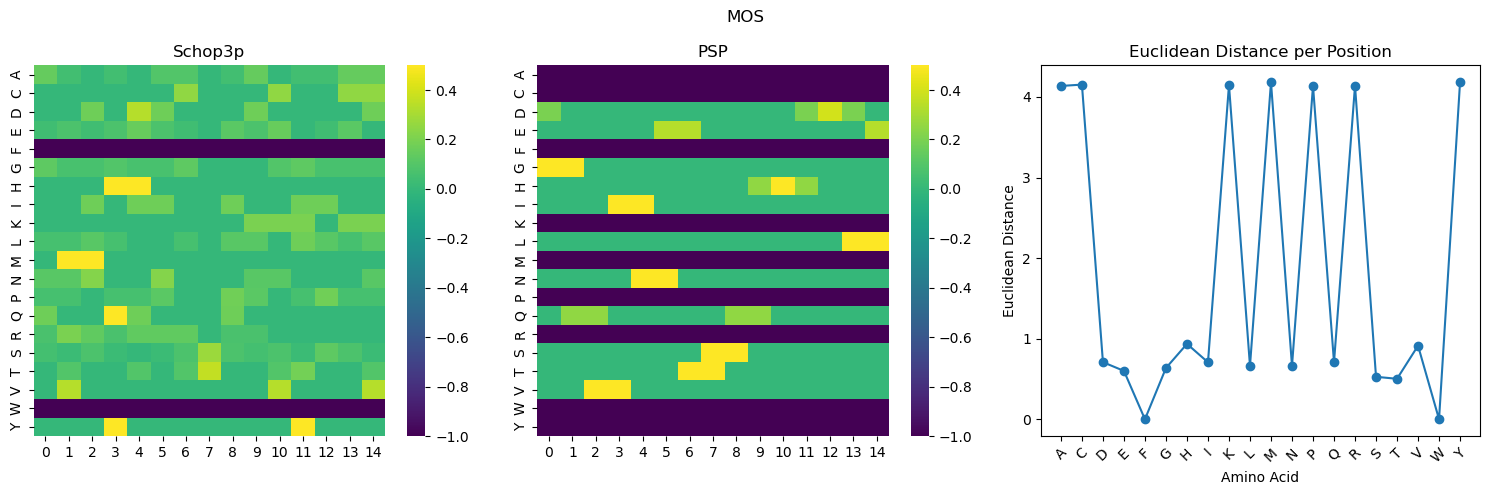

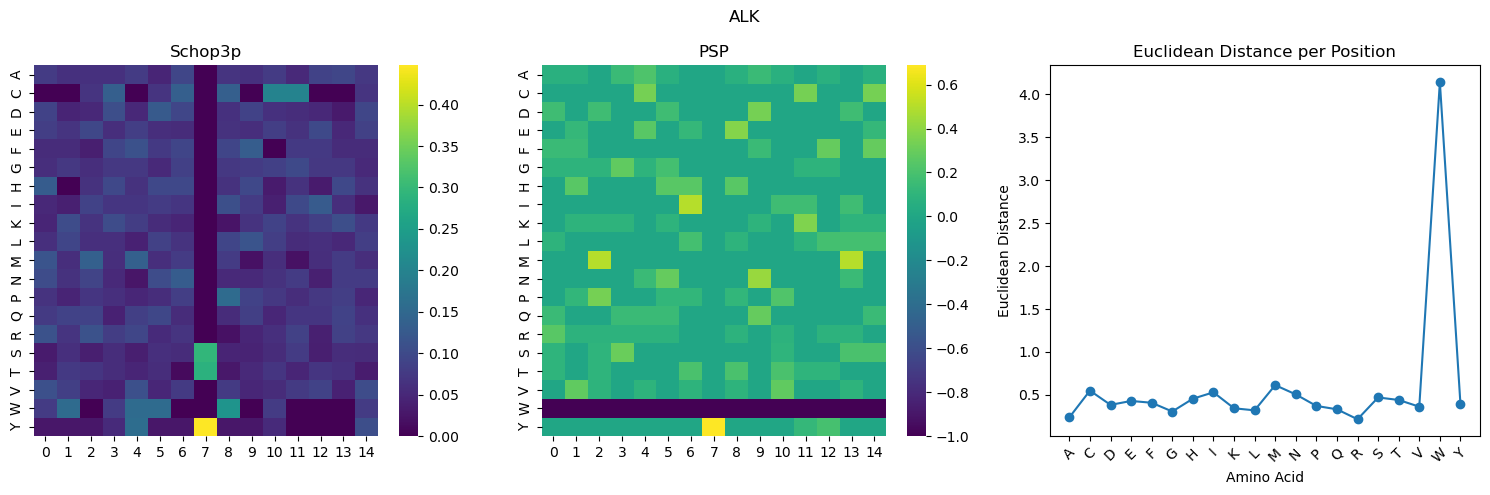

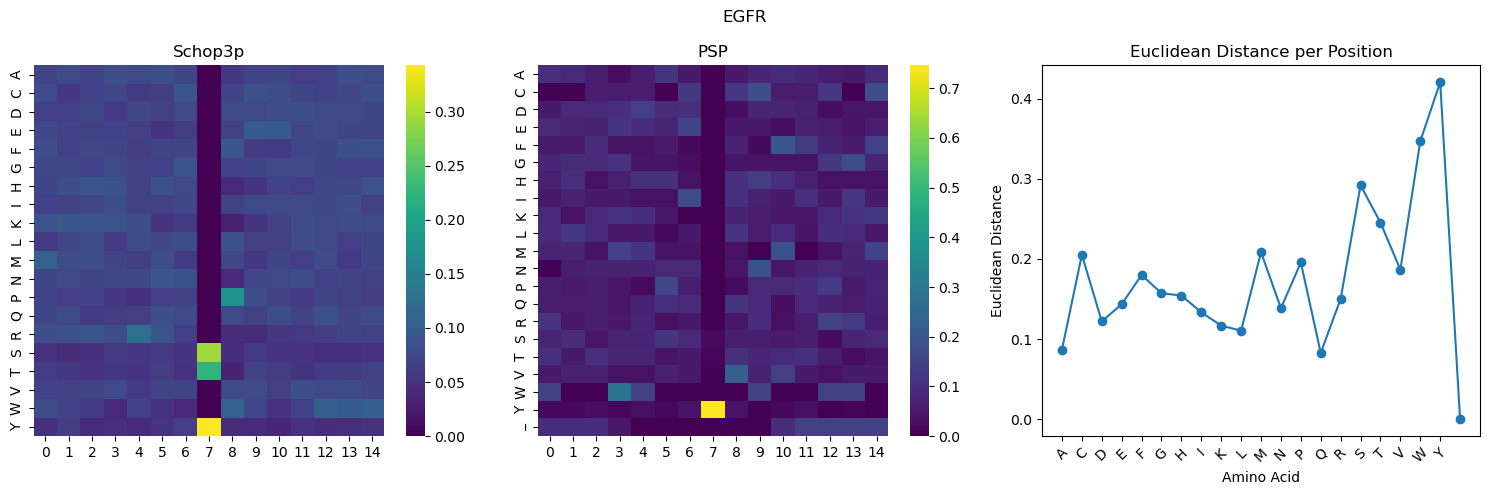

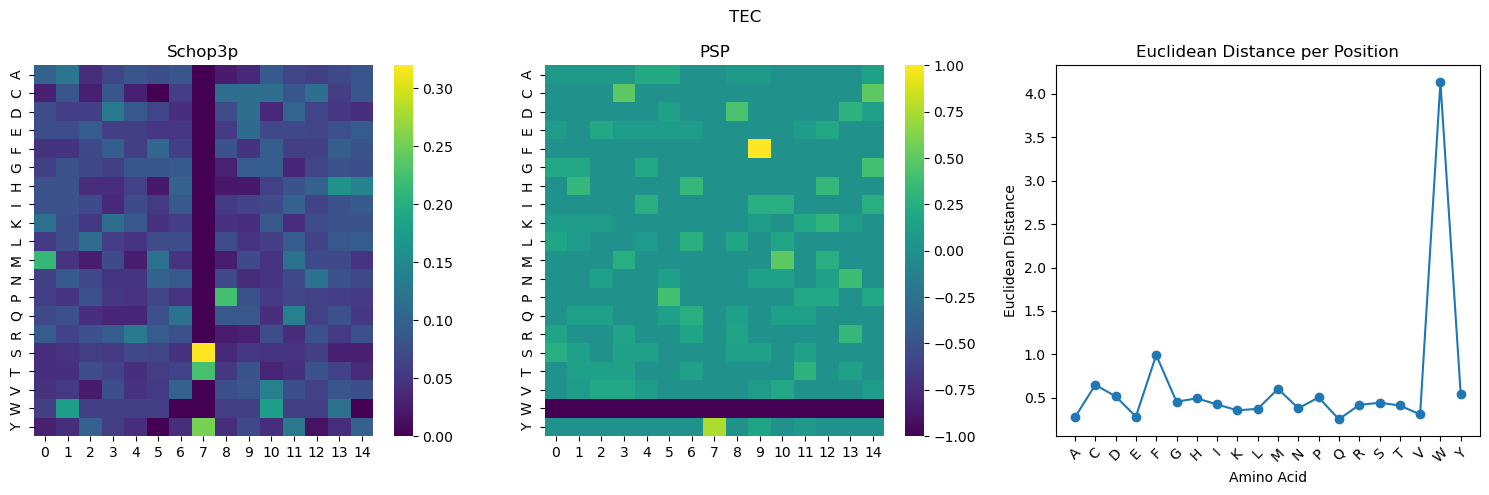

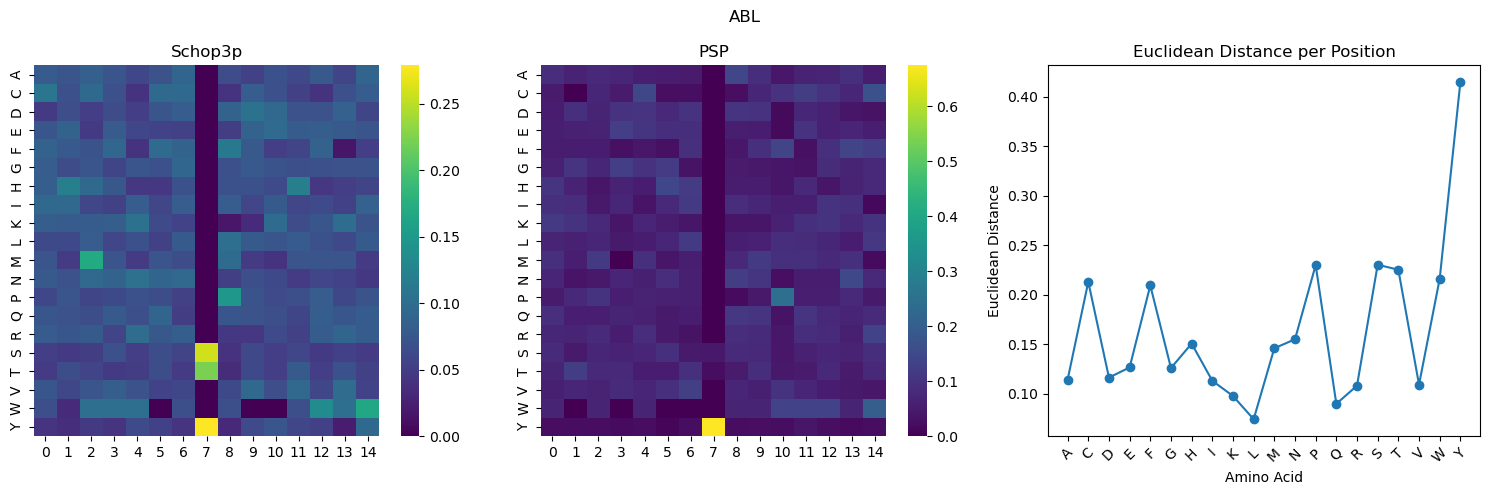

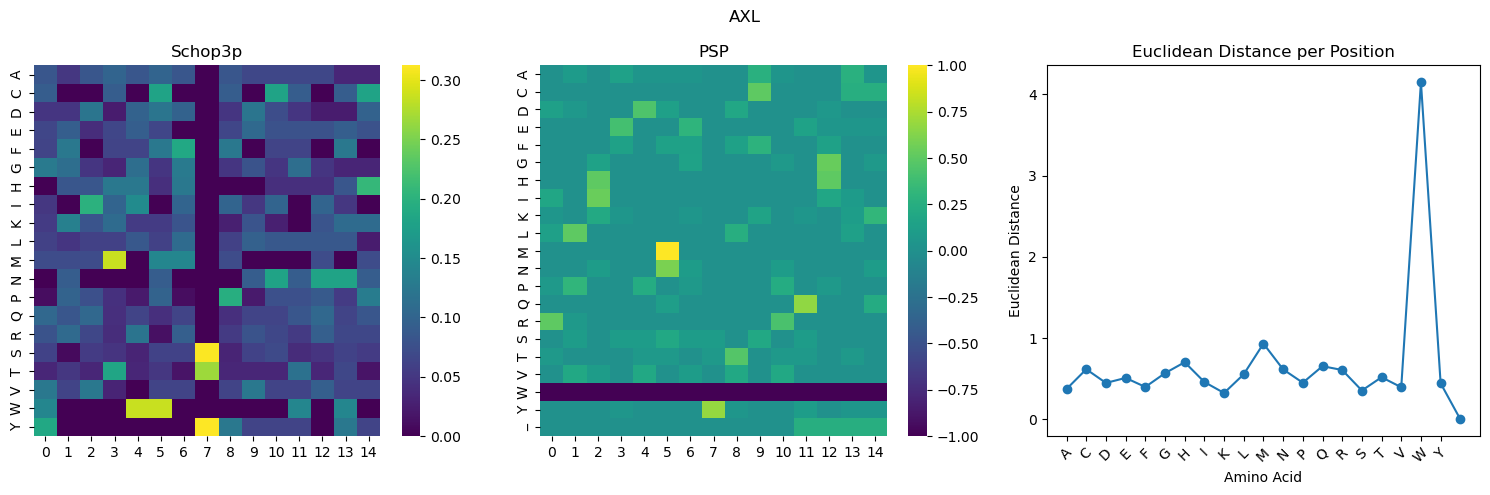

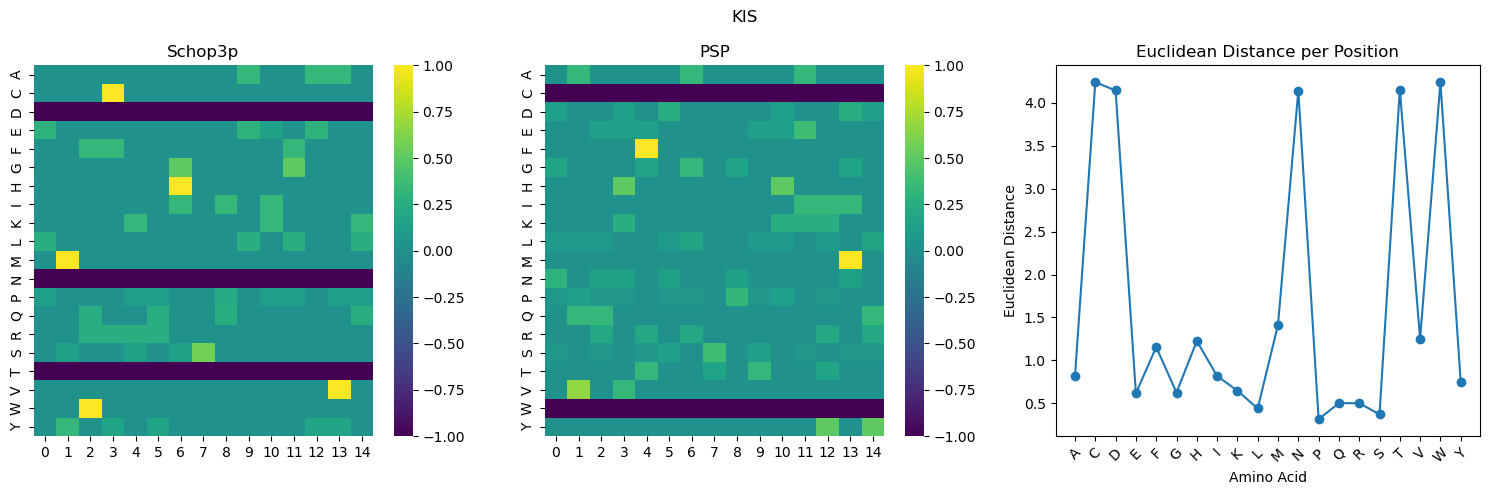

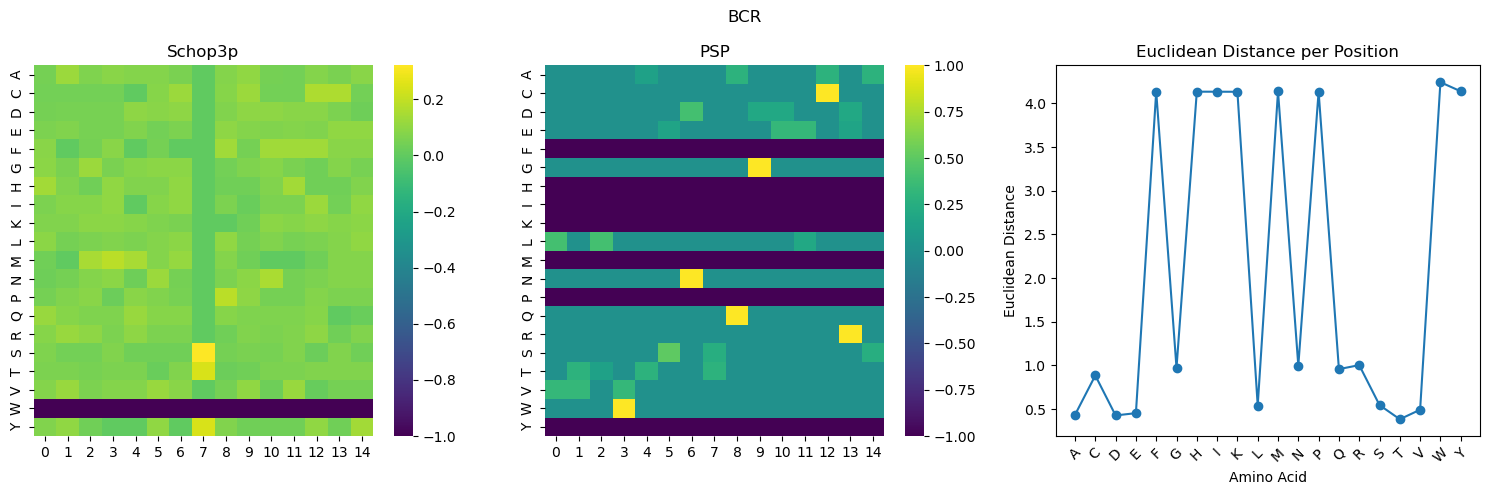

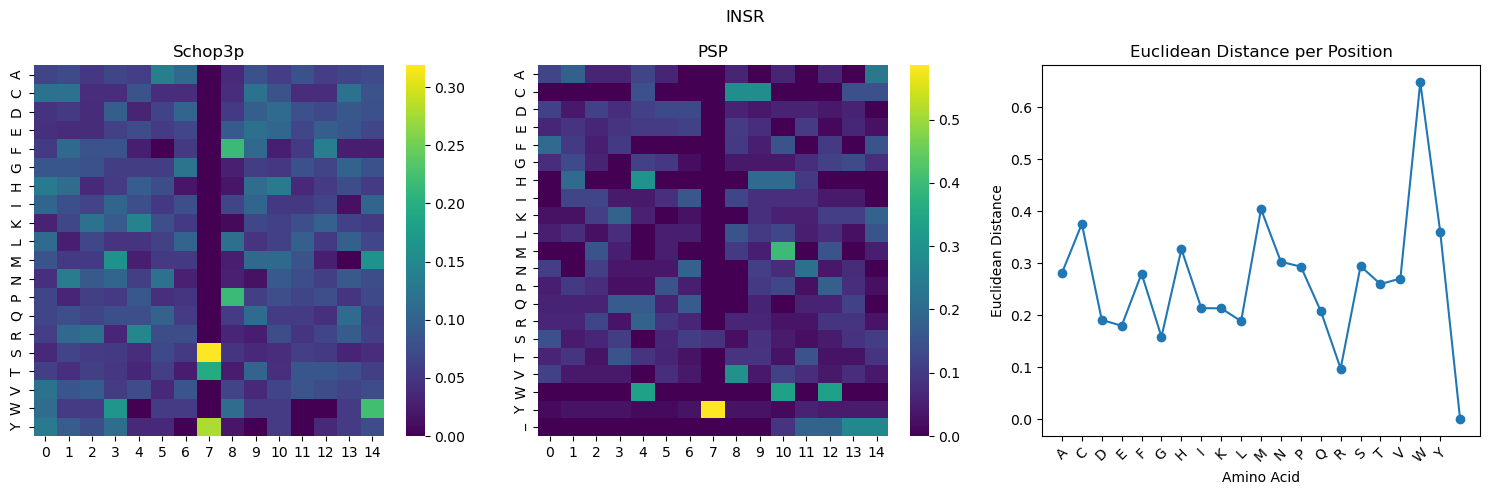

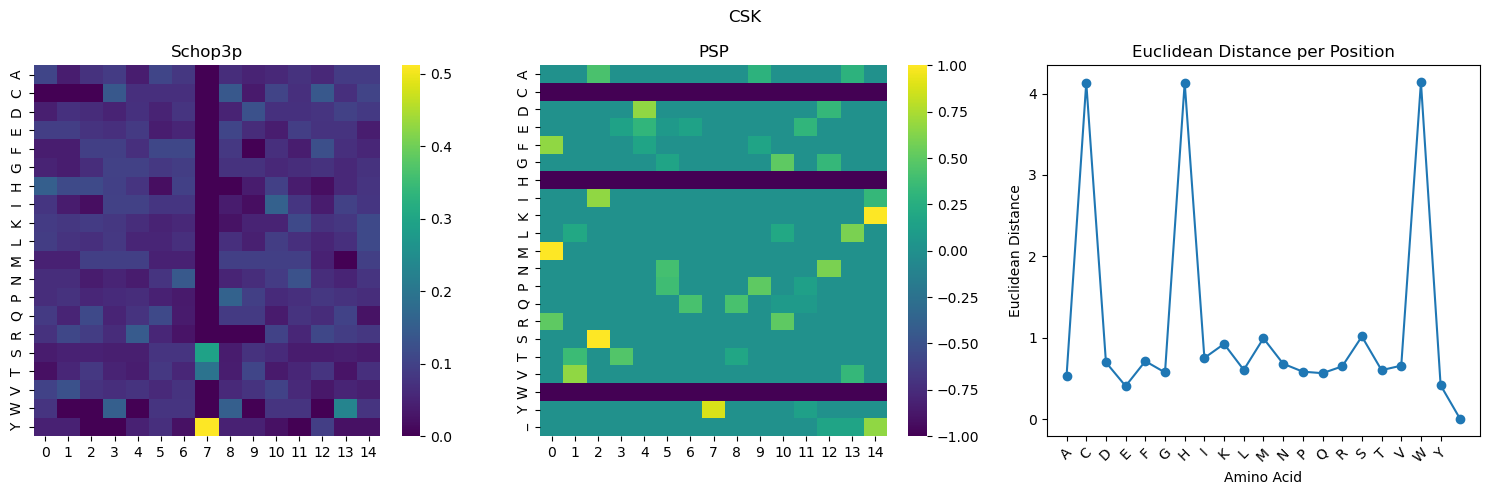

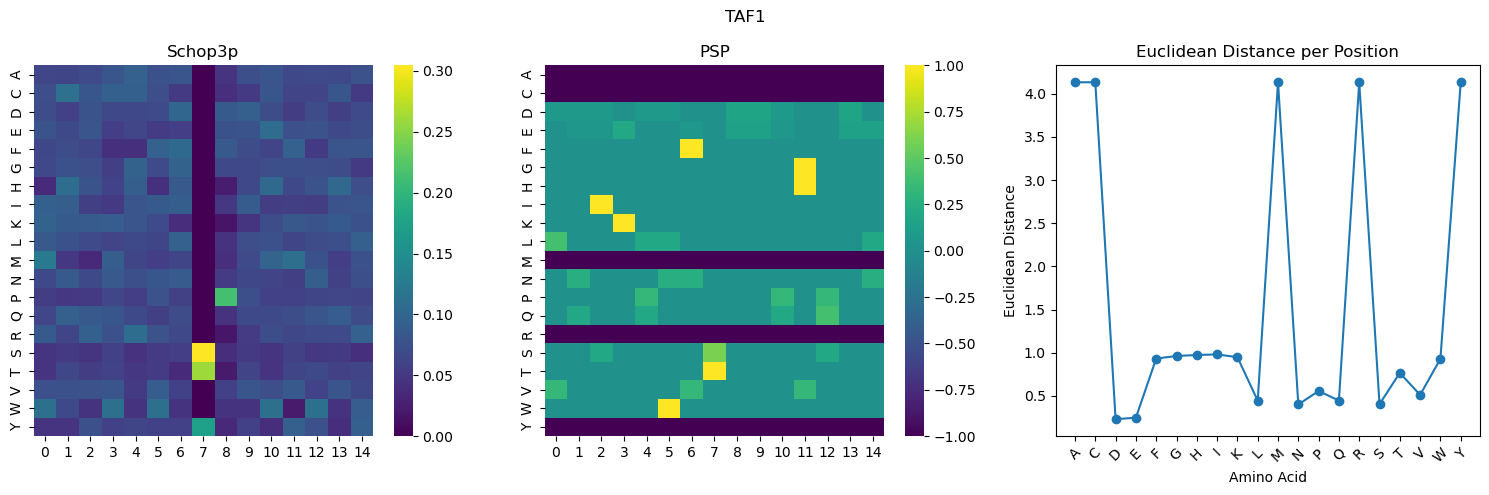

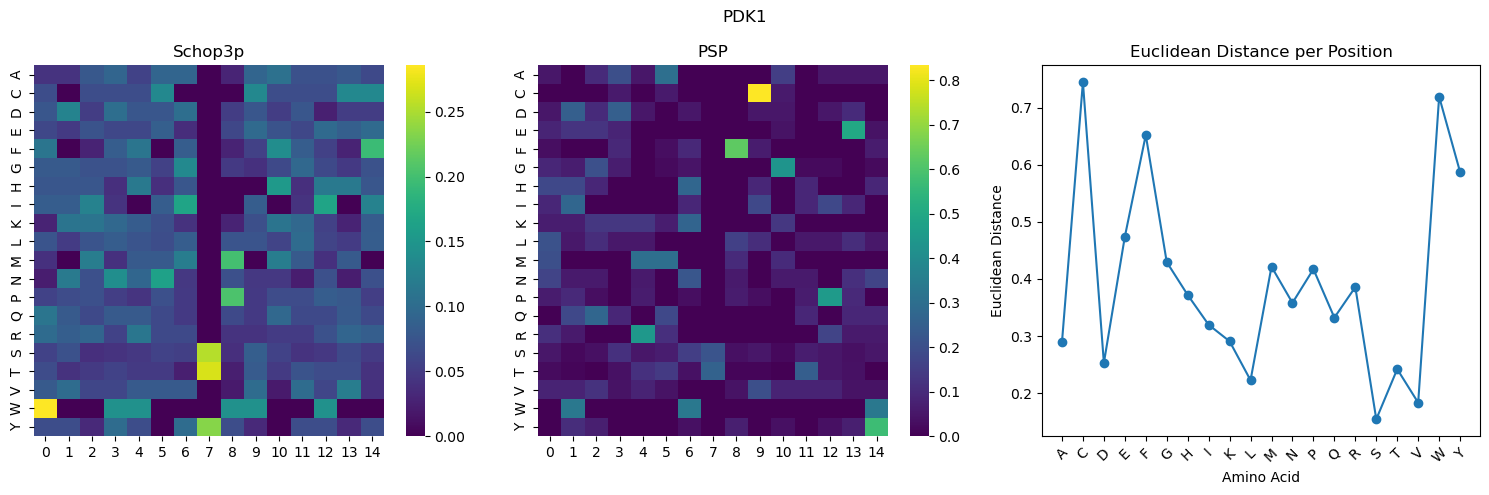

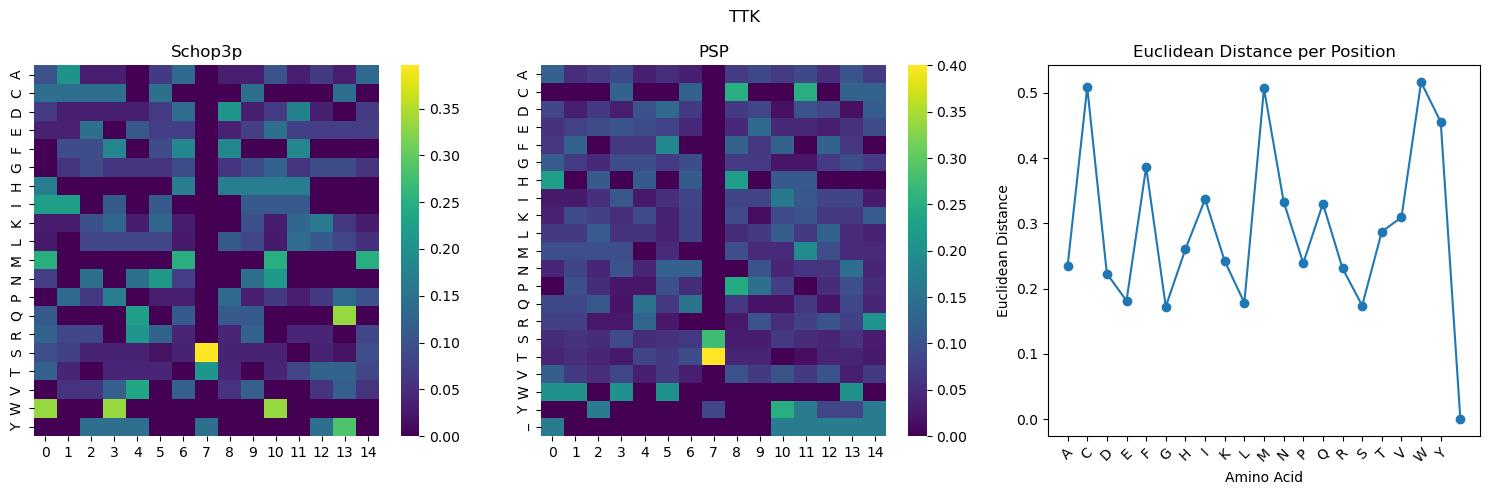

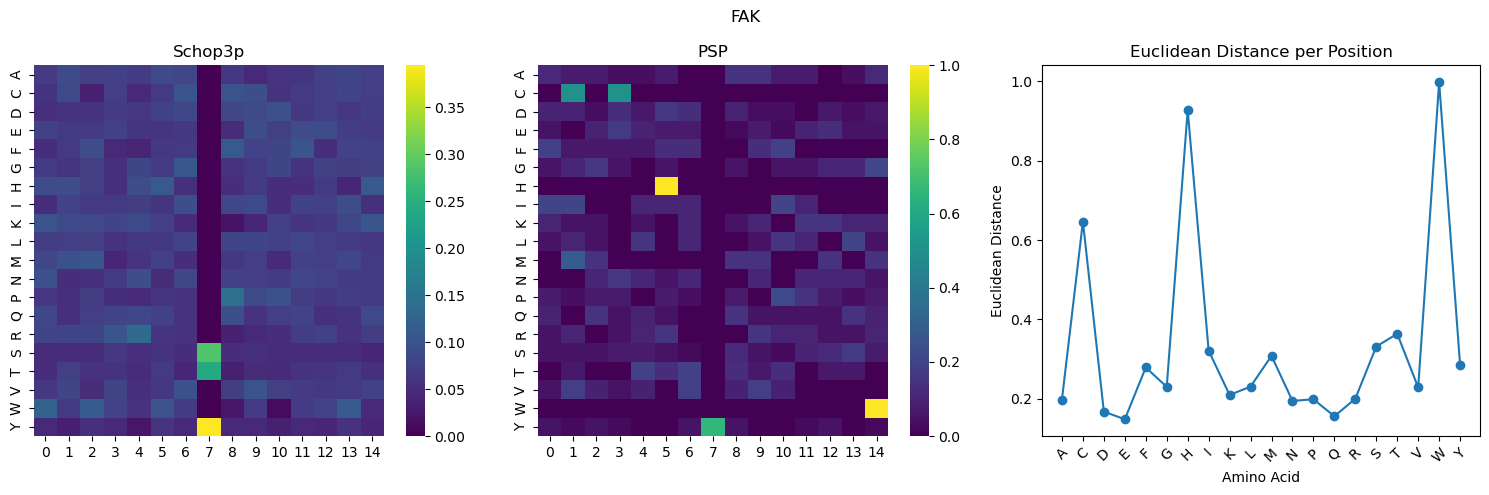

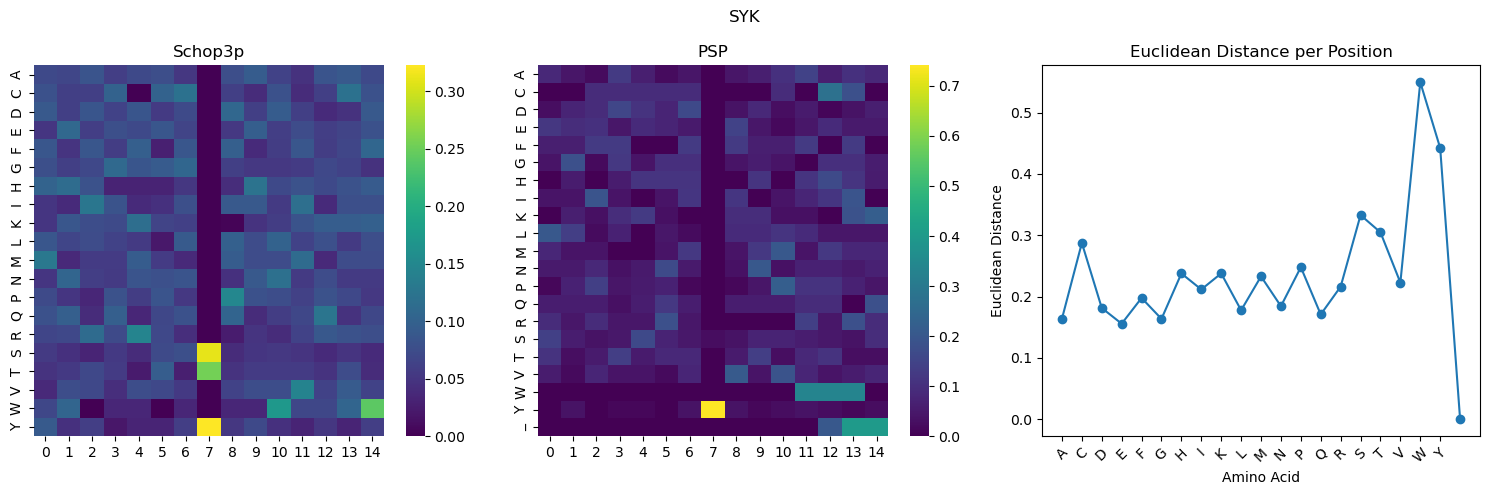

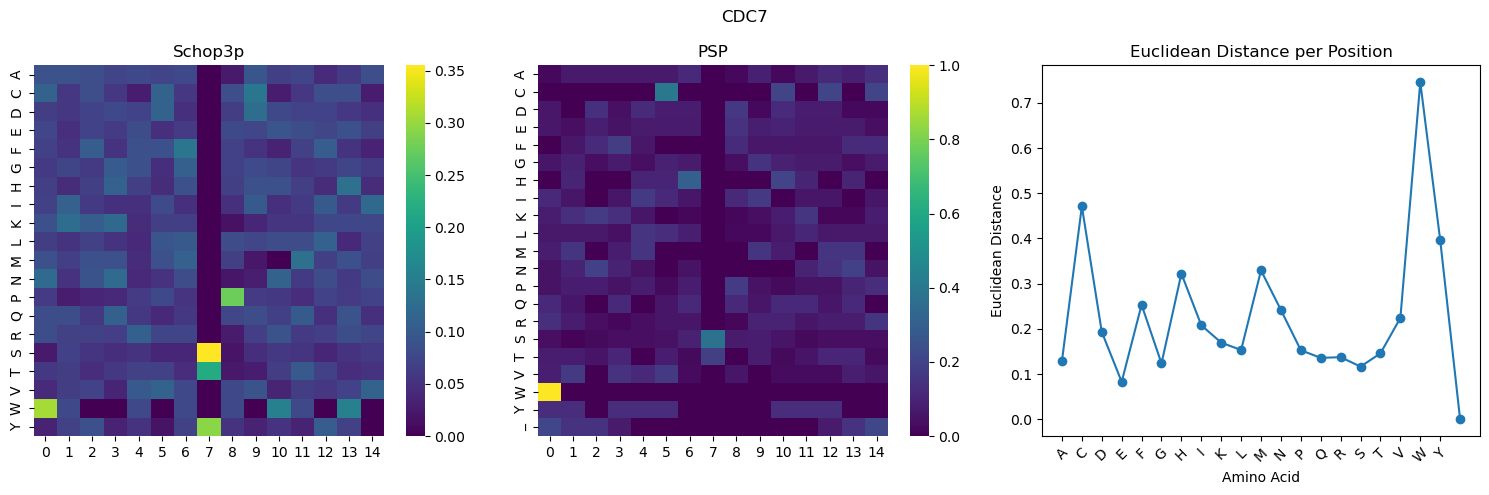

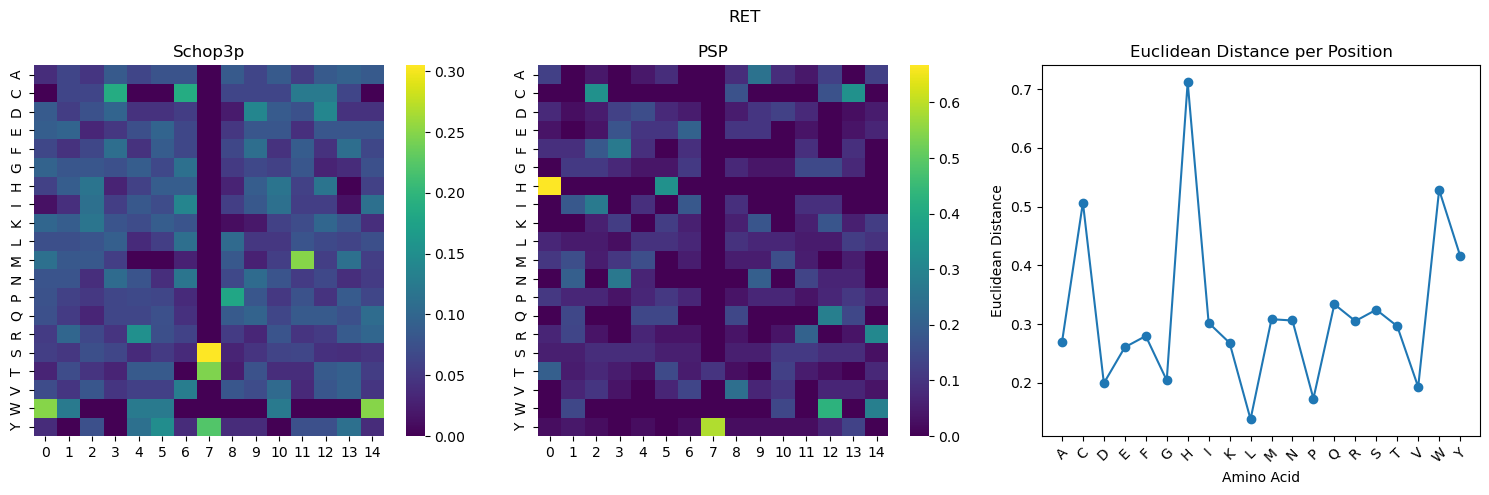

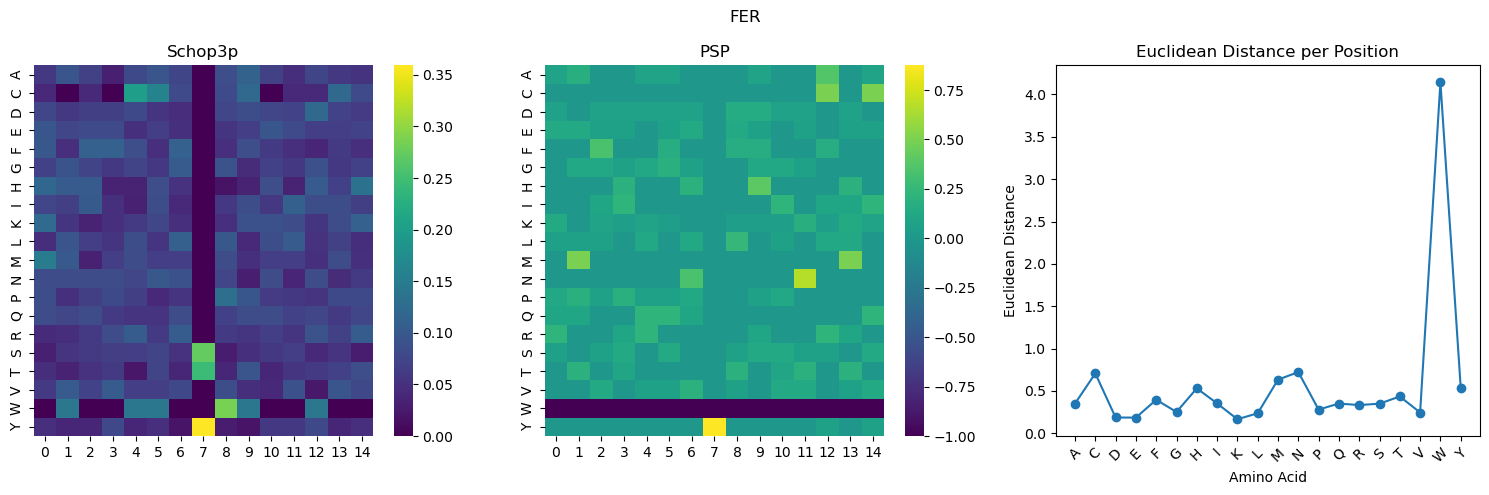

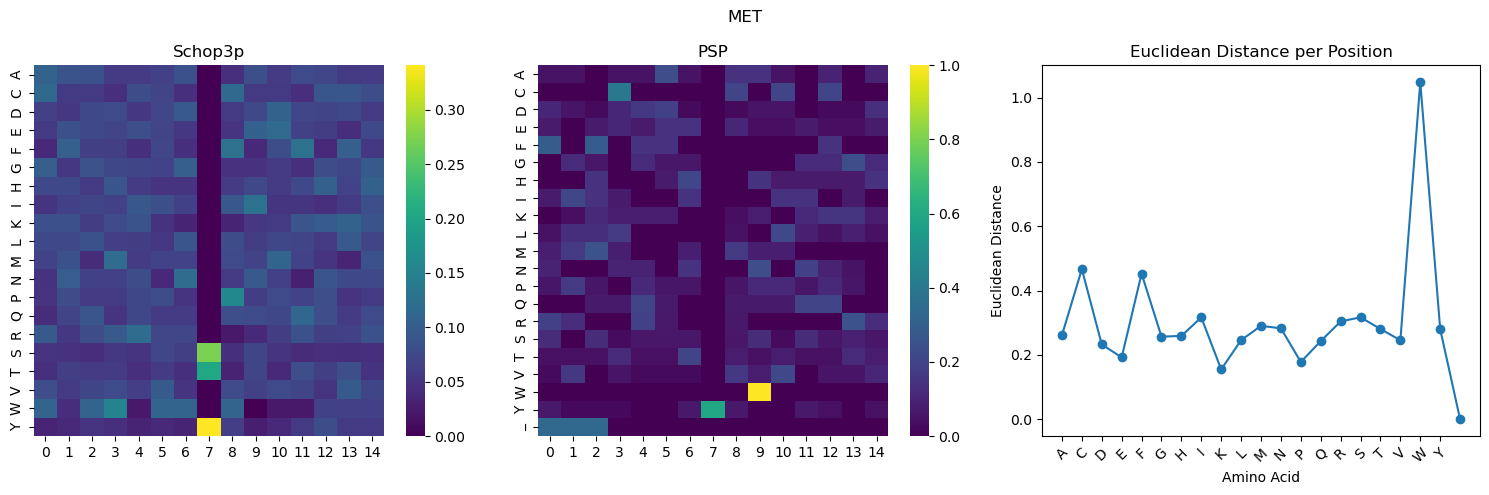

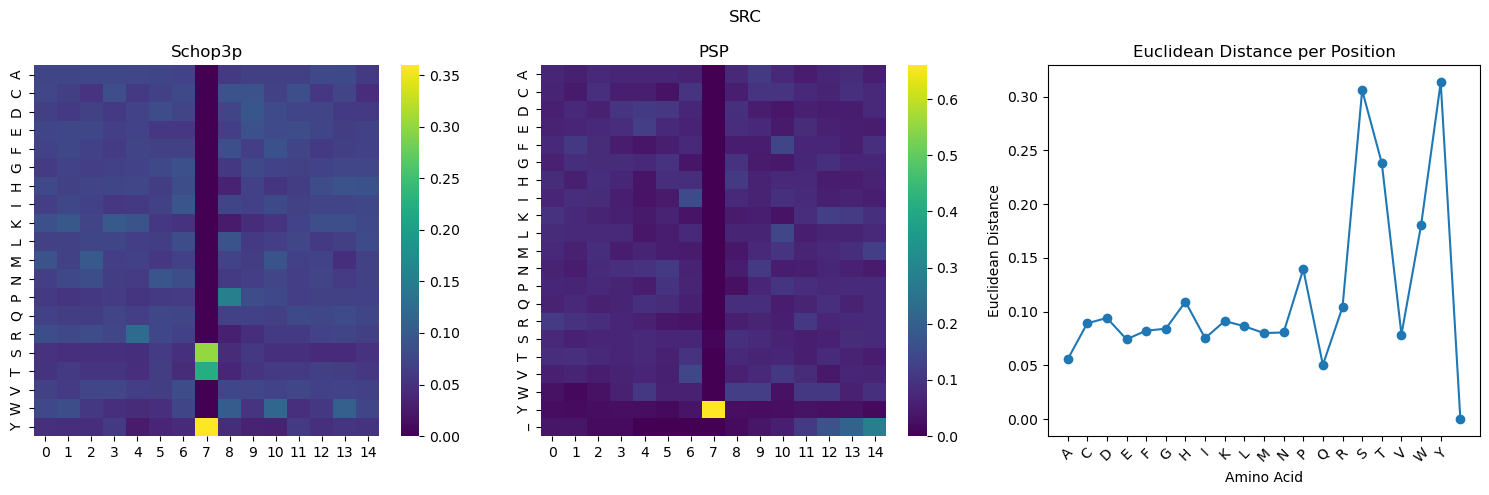

(None,)

In [131]:
plotting_pssm(scop3p_pssm, PSP_pssm, common_family, title1="Schop3p", title2="PSP"), 